## ECS 171 Team Project

# Background

# Dataset Attributes

In [1]:
!pip install nltk
!pip install textblob

In [6]:
import pandas as pd 
import numpy as np

# NLP Packages
import textblob
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

import re

In [3]:
from dataclean import process_data

train_df=process_data('data/train.csv')

/Users/michelle/Desktop/ecs171/dataclean.py:124: FutureWarning: The default value of regex will change from True to False in a future version.
  data.text = data.text.str.replace('\d+', '') #remove numbers
/Users/michelle/Desktop/ecs171/dataclean.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][sentence] = re.sub(r"http\S+", "", data['text'][sentence])
/Users/michelle/Desktop/ecs171/dataclean.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][sentence] = data['text'][sentence].translate(str.maketrans('', '', string.punctuation))


In [4]:
train_df.head(40)

,keyword,text,target
0,nan,our deeds are reason of earthquake may allah f...,1
1,nan,forest fire near la ronge sask canada,1
2,nan,all residents asked to shelter in place are be...,1
3,nan,people receive wildfires evacuation orders in...,1
4,nan,just got sent photo from ruby alaska as smoke ...,1
5,nan,rockyfire update california hwy closed in bot...,1
6,nan,flood disaster heavy rain causes flash floodin...,1
7,nan,i am on top of hill and can see fire in woods,1
8,nan,there is emergency evacuation happening now in...,1
9,nan,i am afraid tornado is coming to our area,1


In [7]:
sentence = train_df.iloc[19]
print(sentence)
print(sentence['text'])
words = ''.join(sentence['text']).split()
print(words)
[str(TextBlob(word).correct()) for word in words]
print(words)

keyword                     nan
text       what goooooooaaaaaal
target                        0
Name: 19, dtype: object
what goooooooaaaaaal
['what', 'goooooooaaaaaal']
['what', 'goooooooaaaaaal']


In [8]:
train_df.text.apply(lambda txt: ''.join(textblob.TextBlob(txt).correct()))

0       our deeds are reason of earthquake may allah f...
1                    forest fire near la range ask canada
2       all residents asked to shelter in place are be...
3        people receive wildfires evacuation orders in...
4       just got sent photo from ruby alaska as smoke ...
                              ...                        
7608    two giant cranks holding bridge collapse into ...
7609    ariaahrary thetawniest out of control wild fir...
7610                         m  tuck s of volcano hawaii 
7611    police investigation after bike collided with ...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [ ]:
#unique words
uniqueWords = list(set(" ".join(train_df['text']).lower().split(" ")))
count = len(uniqueWords)
print(count)

# Total words
train_df['total_words'] = train_df['text'].str.split().str.len()
print(train_df['total_words'].sum())

17229
97279


In [10]:
import csv
train_df.to_csv('updated_data.csv')

In [ ]:
#unique words
uniqueWords = list(set(" ".join(train_df['text']).lower().split(" ")))
count = len(uniqueWords)
print(count)

# Total words
train_df['total_words'] = train_df['text'].str.split().str.len()
print(train_df['total_words'].sum())


17229
97279


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train_df['text'])
print(train_matrix)
# test_matrix = vectorizer.transform(test_df['text'])


  (0, 10702)	1
  (0, 3751)	1
  (0, 738)	1
  (0, 12047)	1
  (0, 10436)	1
  (0, 4526)	1
  (0, 9182)	1
  (0, 409)	1
  (0, 5633)	1
  (0, 15740)	1
  (0, 408)	1
  (1, 5623)	1
  (1, 5426)	1
  (1, 10010)	1
  (1, 8277)	1
  (1, 12596)	1
  (1, 12878)	1
  (1, 2225)	1
  (2, 738)	2
  (2, 408)	1
  (2, 12312)	1
  (2, 876)	1
  (2, 15078)	1
  (2, 13272)	2
  (2, 7266)	2
  :	:
  (7611, 11338)	1
  (7611, 16437)	1
  (7611, 12438)	1
  (7611, 8658)	1
  (7611, 13150)	1
  (7611, 241)	1
  (7611, 7514)	1
  (7611, 14952)	1
  (7611, 2915)	1
  (7611, 4549)	2
  (7611, 11389)	1
  (7611, 14304)	1
  (7611, 10222)	1
  (7611, 7384)	1
  (7612, 2113)	1
  (7612, 2177)	1
  (7612, 14807)	1
  (7612, 9692)	1
  (7612, 10083)	1
  (7612, 8367)	1
  (7612, 10252)	1
  (7612, 16367)	1
  (7612, 6876)	1
  (7612, 26)	1
  (7612, 11984)	1


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_matrix, train_df['target'], random_state=1, test_size = 0.2)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       958
           1       0.70      0.80      0.75       565

    accuracy                           0.80      1523
   macro avg       0.79      0.80      0.79      1523
weighted avg       0.81      0.80      0.80      1523



<AxesSubplot:>

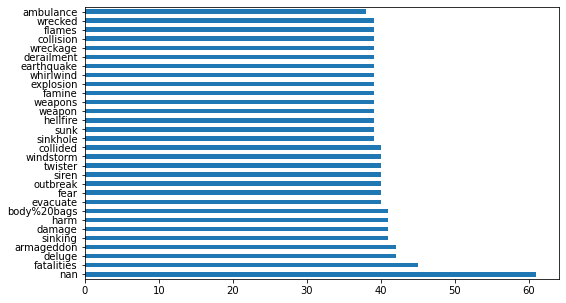

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8.5,5)
train_df['keyword'].value_counts()[:30].plot(kind='barh')